# Model Evaluation

### Performance comparision

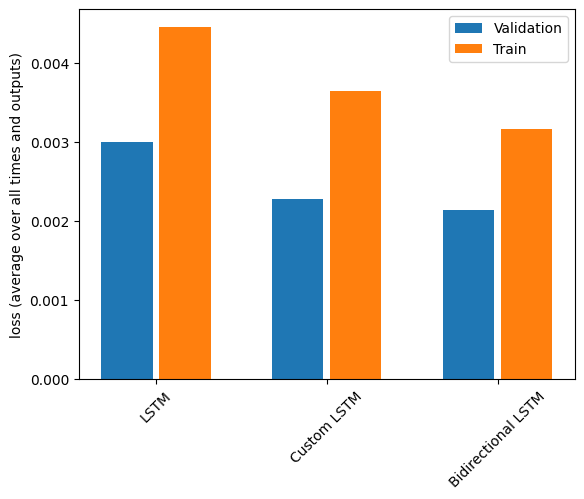

In [133]:
#x = np.arange(len(multi_performance))
#width = 0.3
#
#metric_name = 'mean_absolute_error'
#metric_index = our_lstm_model.metrics_names.index(metric_name)
#val_mae = [v[metric_index] for v in multi_val_performance.values()]
#test_mae = [v[metric_index] for v in multi_performance.values()]
#
#plt.bar(x - 0.17, val_mae, width, label='Validation')
#plt.bar(x + 0.17, test_mae, width, label='Train')
#plt.xticks(ticks=x, labels=multi_performance.keys(), rotation=45)
#plt.ylabel(f'{metric_name} (average over all times and outputs)')
#_ = plt.legend()

# Choose the appropriate metric from the available options
metric_name = 'loss'  # Example: Using 'loss' metric

# Check if the metric name is present in the list
if metric_name not in our_lstm_model.metrics_names:
    print(f"Metric '{metric_name}' is not available for the model.")
else:
    metric_index = our_lstm_model.metrics_names.index(metric_name)
    val_mae = [v[metric_index] for v in multi_val_performance.values()]
    test_mae = [v[metric_index] for v in multi_performance.values()]

    plt.bar(x - 0.17, val_mae, width, label='Validation')
    plt.bar(x + 0.17, test_mae, width, label='Train')
    plt.xticks(ticks=x, labels=multi_performance.keys(), rotation=45)
    plt.ylabel(f'{metric_name} (average over all times and outputs)')
    _ = plt.legend()

In [134]:
#for name, value in multi_performance.items():
#    print(f'{name:8s}: {value[1]:0.4f}')
#print()
#
#for name, value in multi_performance.items():
#    z = float(our_scaler_tv.inverse_transform(np.array([[value[1]]])))
#    print(f'{name:8s}: {z:0.4f}')

# Print original values
for name, value in multi_performance.items():
    print(f'{name:8s}: {value[1]:0.4f}')
print()

# Apply scaler transformation and print transformed values
for name, value in multi_performance.items():
    z = float(our_scaler_tv.inverse_transform(np.array([[value[1]]])))
    print(f'{name:8s}: {z:0.4f}')

LSTM    : 0.0377
Custom LSTM: 0.0355
Bidirectional LSTM: 0.0318

LSTM    : 274.5271
Custom LSTM: 258.7957
Bidirectional LSTM: 231.5071


128/128 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step


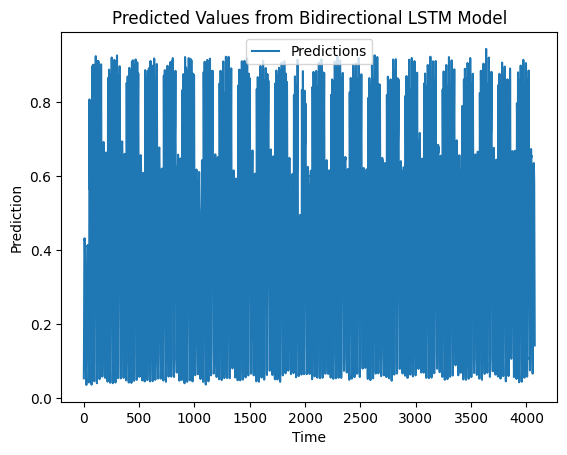

In [138]:
final_predictions = our_models['Bidirectional LSTM'].predict(our_window1.test)
final_predictions
import matplotlib.pyplot as plt

# Assuming `final_predictions` contains the predicted values
# Adjust the x-axis values according to your data
x_axis = range(len(final_predictions))

# Plot the predictions
plt.plot(x_axis, final_predictions, label='Predictions')

# Add labels and title to the plot
plt.xlabel('Time')
plt.ylabel('Prediction')
plt.title('Predicted Values from Bidirectional LSTM Model')

# Display the legend
plt.legend()

# Show the plot
plt.show()

# Test Result and Analysis:

The project focused on building a multi-step RNN model with LSTM to predict traffic volume on Interstate 94 Westbound in Minnesota. Using a 6-hour input window, the model aimed to forecast the traffic volume 2 hours into the future. The dataset included hourly traffic volume, weather features, and holidays. The LSTM-based model learned patterns to make accurate predictions, considering the dynamic nature of traffic and external factors.

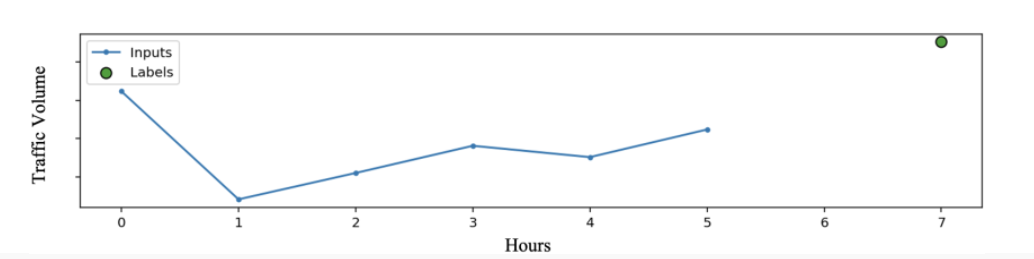

During initial data processing, approximately 7629 duplicate hourly entries were discovered in the dataset. Initially, the dataset was treated as individual records per hour, leading to modest validation results. However, after preprocessing the data as a time series indexed at 1-hour intervals, the validation results significantly improved. The data was then split into training, validation, and testing sets to ensure proper tracking. Additionally, missing data spanning 10 months between 2014 and 2015 was identified, affecting validation records and creating a noticeable gap in the data.

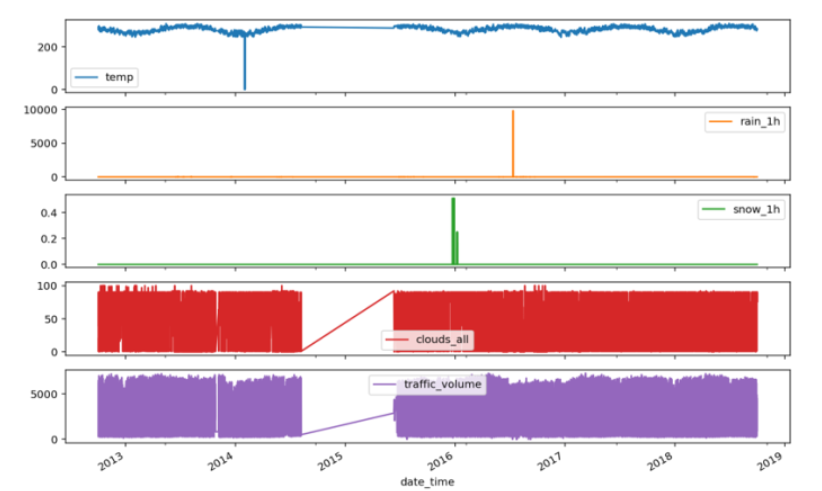

We used neural networks to deal with it and for the outliers that were obsereved in few of the records e.g two days had the temperature field set at zero, which didn't seem right, we fixed it by setting the missing values with the temperature average of each day. 

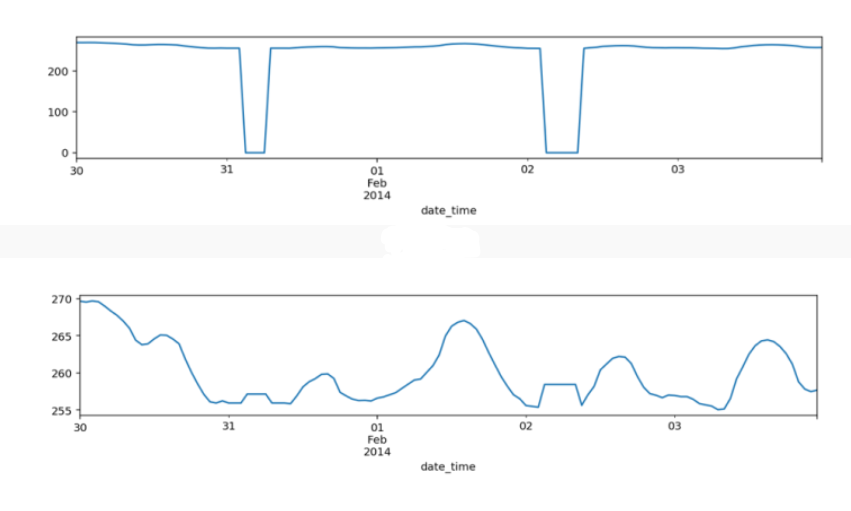

In the data preprocessing stage, several adjustments and transformations were made. 

- Duplicate entries were removed, and extreme values in the rain field were set to the mean of the respective day. For snow, extreme values were kept as they could indicate exceptional winter conditions.
- Weather related features were modified. Weather_main was transformed into one-hot encoded variables, while weather_description was dropped as it contained redundant information.
- The focus was shifted to capturing whether a day was a holiday or a weekend. The feature holiday was replaced with a new feature, is_holiday. Similarly, a new feature, is_weekend, was created to indicate weekends.
- The date_time field was converted into signals using sin and cos functions to represent "Time of day" and "Time of year". This provided the model with important frequency features.
- Additional features were derived by breaking down the date_time components into dayofweek, day, month, year, and day_hour.
- Overall, the feature set increased from 9 to 27, incorporating the above transformations and additions.
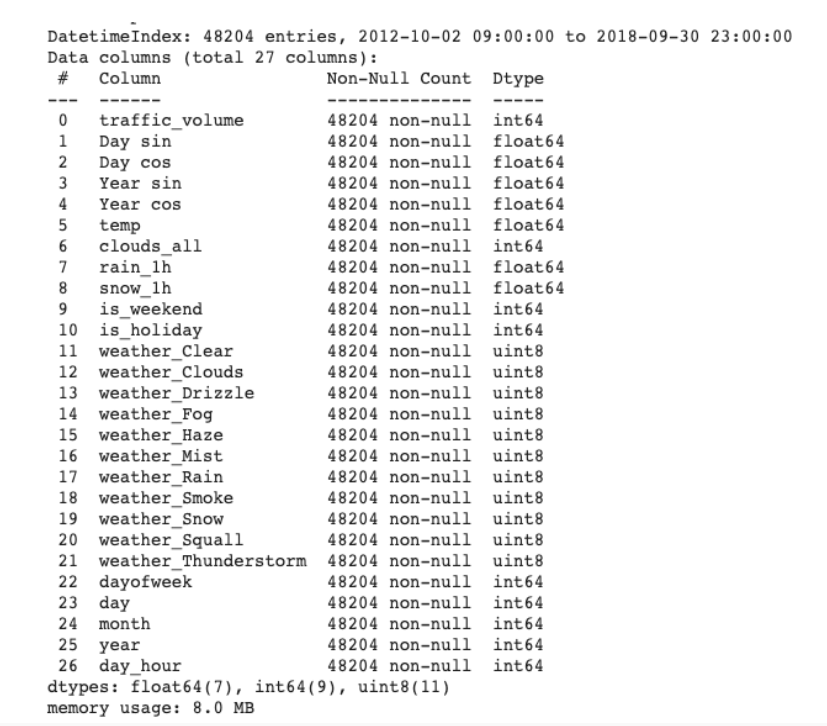

To address the issue of duplicate hourly entries, the data was resampled to a 1-hour basis, averaging duplicate records within the same hour. This resampling was performed after splitting the dataset into training, validation, and testing sets.

In the hyperparameter tuning process, Min-Max Normalization yielded the best results compared to Standard Scaling. Rather than using automated hyperparameter search methods, a systematic approach was adopted to evaluate the impact of each hyperparameter individually on the RNN and LSTM models.

Due to time constraints, quick and pragmatic methods were employed to gain insights into the behavior of LSTM networks. This included manual testing with extremely small and large values for the number of LSTM units, as well as incorporating other layer types such as Convolutional, Dense, GRU, and Bi-directional layers. Different batch sizes were also experimented with. Observations from these tests were combined to determine the best-performing models based on layer configurations and hyperparameters.
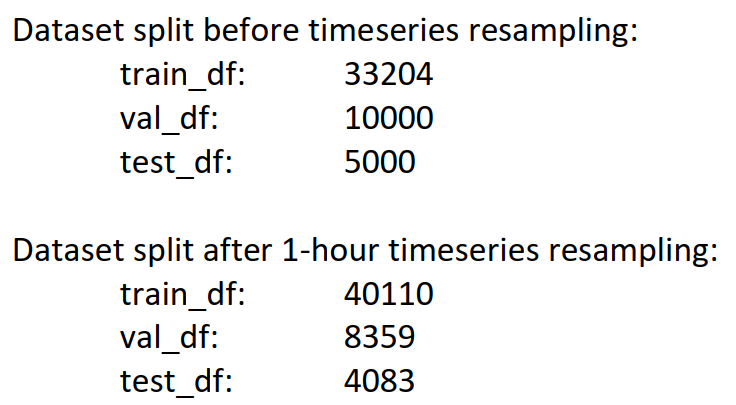

In the search for well-known LSTM model architectures, only a few references with a couple of LSTM layers were found, unlike the abundance of architectures available for Convolutional Neural Networks.

Systematic testing involved various hyperparameters, including:
- Number of LSTM units and layers, as well as Dense units in the final layers (Model 1)
- Bi-Directional LSTM (Model 2)

In addition, variations of three reference models from the TensorFlow tutorial (Dense, Conv, and LSTM) were considered. Two custom models, MyLSTM_1 and MyLSTM_2, outperformed the reference models.

The best-performing model employed bidirectional LSTMs with two custom forward and backward layers. It included two dense layers with 512 units each, and a final dense output layer with a single unit. This model demonstrated the best performance and exhibited low variance over multiple training epochs, as shown in the figure.
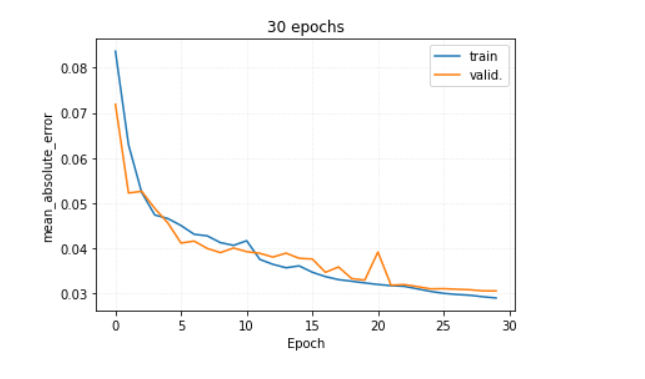

The predictions in (Figure) show that the model captured all the significant patterns with minor misses of some anomalies. 
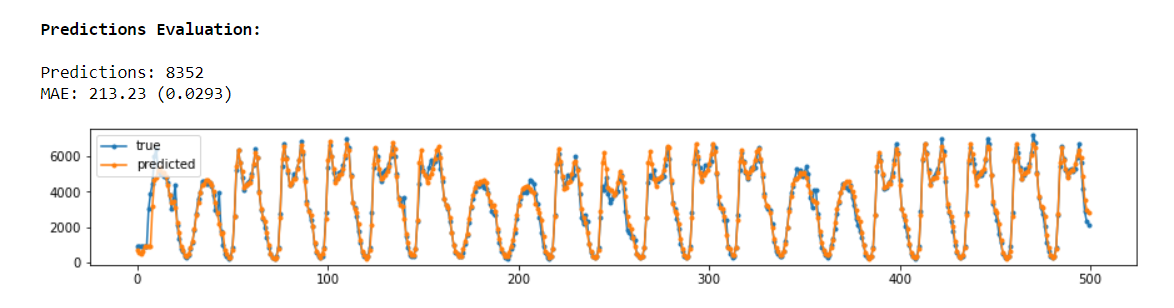

# Conclusion

- The LSTM Bi-Directional model outperformed others with the least variance, indicating its superior performance and stability.
- Increasing the number of LSTM units within a layer improved results, but deeper LSTM networks did not yield better outcomes.
- Despite the expectation that LSTM and GRU would mitigate the Vanishing Gradient Descent problem in deep networks, building deeper networks did not provide benefits in this case.
- Models with fewer LSTM units typically exhibited minimal overfitting and demonstrated better validation scores compared to training scores. This suggests better generalization and performance on unseen data.